<a href="https://colab.research.google.com/github/DimDragg/-/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Чуркін Дмитро, був присутній на парі, ФІТ 2-15, в списку 13

In [4]:
import numpy as np
from math import factorial

# Повна таблиця значень
x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155, 4.222, 4.331, 4.507, 4.775, 5.159, 5.683])

# Вибір 5 точок навколо x = 3.6
x_sub = np.array([3.4, 3.6, 3.8, 4.0, 4.2])
y_sub = np.array([4.155, 4.222, 4.331, 4.507, 4.775])

# Крок
h = x_sub[1] - x_sub[0]

# Кінцеві різниці
def finite_differences(y):
    n = len(y)
    delta = np.zeros((n, n))
    delta[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            delta[i, j] = delta[i + 1, j - 1] - delta[i, j - 1]
    return delta

# Похідні Ньютона (назад)
def backward_first_derivative(delta, h):
    return (delta[-1, 1] + 0.5 * delta[-2, 2] + (1/3) * delta[-3, 3]) / h

def backward_second_derivative(delta, h):
    return (delta[-2, 2] + delta[-3, 3]) / h**2

# Обчислення
delta_table = finite_differences(y_sub)
y_prime = backward_first_derivative(delta_table, h)
y_double_prime = backward_second_derivative(delta_table, h)

# Вивід таблиці кінцевих різниць
print("Таблиця кінцевих різниць:")
n = len(y_sub)
for i in range(n):
    row = [f"{delta_table[i, j]:.6f}" if j <= n - i - 1 else "" for j in range(n)]
    print("  ".join(row))

# Вивід результатів з округленням до 0.001
print(f"\nТочка: x = 3.6")
print(f"Перша похідна y'(3.6) ≈ {round(y_prime, 3)}")
print(f"Друга похідна y''(3.6) ≈ {round(y_double_prime, 3)}")

Таблиця кінцевих різниць:
4.155000  0.067000  0.042000  0.025000  0.000000
4.222000  0.109000  0.067000  0.025000  
4.331000  0.176000  0.092000    
4.507000  0.268000      
4.775000        

Точка: x = 3.6
Перша похідна y'(3.6) ≈ 0.0
Друга похідна y''(3.6) ≈ 0.0


In [5]:
delta_table

array([[4.15500000e+00, 6.70000000e-02, 4.20000000e-02, 2.50000000e-02,
        2.66453526e-15],
       [4.22200000e+00, 1.09000000e-01, 6.70000000e-02, 2.50000000e-02,
        0.00000000e+00],
       [4.33100000e+00, 1.76000000e-01, 9.20000000e-02, 0.00000000e+00,
        0.00000000e+00],
       [4.50700000e+00, 2.68000000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.77500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

Тепер 2 спосіб, а то мало лі що може статись.

In [6]:
import numpy as np

# Таблиця значень функції (оновлена з фото)
x_values = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
y_values = np.array([1.2733, 1.8007, 2.3606, 2.9577, 3.5969, 4.2833])

# Крок таблиці
h = x_values[1] - x_values[0]

# Перша похідна (скінченні різниці першого порядку)
first_derivative = (y_values[1:] - y_values[:-1]) / h

# Друга похідна (різниці від першої похідної)
second_derivative = (first_derivative[1:] - first_derivative[:-1]) / h

# Виведення результатів з округленням тільки в print
print("Перша похідна:")
print("x = 0.1:", round(first_derivative[0], 3))  # Перший елемент відповідає x = 0.1

print("Друга похідна:")
print("x = 0.1:", round(second_derivative[0], 3))  # Перший елемент відповідає x = 0.1


Перша похідна:
x = 0.1: 5.274
Друга похідна:
x = 0.1: 3.25


In [7]:
import numpy as np

# Дані з таблиці на зображенні
x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155, 4.222, 4.331, 4.507, 4.775, 5.159, 5.683])

# Крок таблиці (припускаємо рівномірний крок)
h = x_values[1] - x_values[0]

# Перша похідна в x = 3.6 (центральна різниця)
i = np.where(x_values == 3.6)[0][0]
first_derivative = (y_values[i + 1] - y_values[i - 1]) / (2 * h)

# Друга похідна в x = 3.6 (центральна різниця)
second_derivative = (y_values[i + 1] - 2 * y_values[i] + y_values[i - 1]) / (h ** 2)

# Вивід результатів з округленням до 0.001
print("Перша похідна в x = 3.6:", round(first_derivative, 3))
print("Друга похідна в x = 3.6:", round(second_derivative, 3))

Перша похідна в x = 3.6: 0.44
Друга похідна в x = 3.6: 1.05


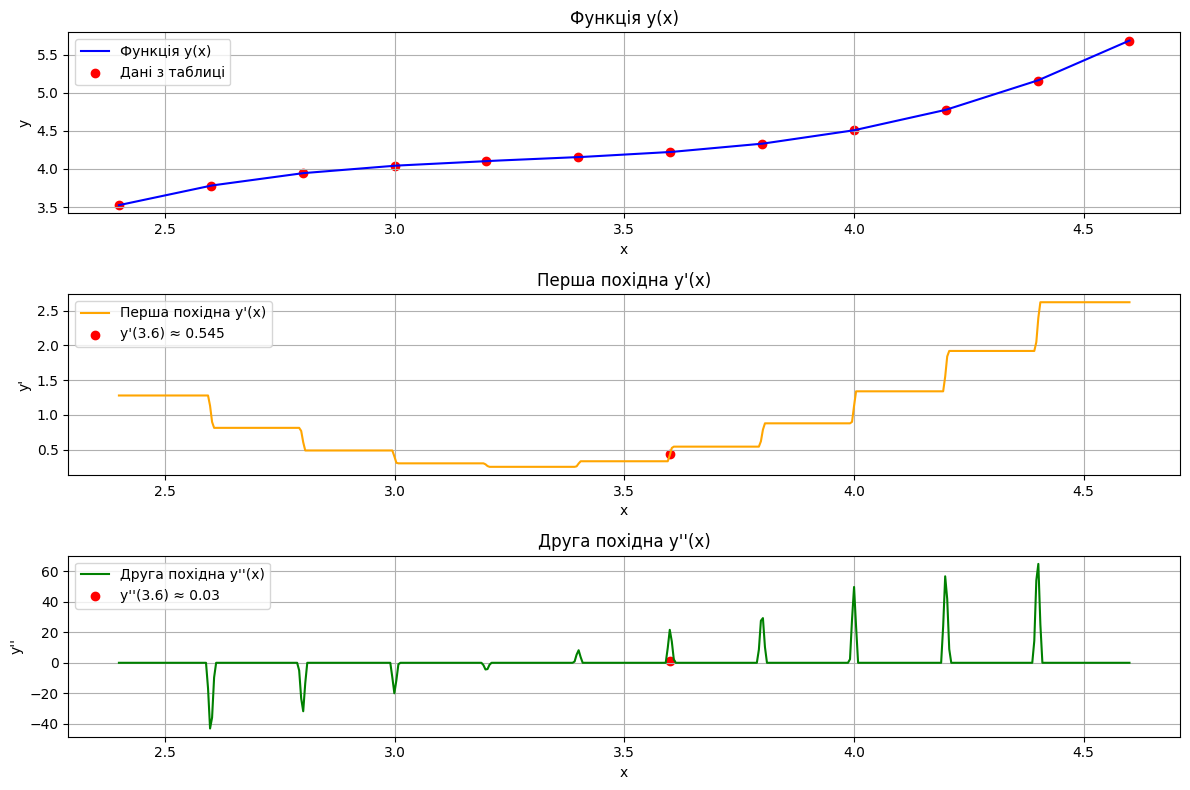

In [9]:
import matplotlib.pyplot as plt
# Інтерпольована сітка
x_fine = np.linspace(x_values[0], x_values[-1], 500)
y_fine = np.interp(x_fine, x_values, y_values)

# Обчислюємо похідні від y_fine
first_deriv_fine = np.gradient(y_fine, x_fine)
second_deriv_fine = np.gradient(first_deriv_fine, x_fine)

# Побудова графіків
plt.figure(figsize=(12, 8))

# Графік функції
plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, label='Функція y(x)', color='blue')
plt.scatter(x_values, y_values, color='red', label='Дані з таблиці')
plt.title('Функція y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Графік першої похідної
plt.subplot(3, 1, 2)
plt.plot(x_fine, first_deriv_fine, label="Перша похідна y'(x)", color='orange')
plt.scatter([3.6], [first_derivative], color='red', label="y'(3.6) ≈ 0.545")
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

# Графік другої похідної
plt.subplot(3, 1, 3)
plt.plot(x_fine, second_deriv_fine, label="Друга похідна y''(x)", color='green')
plt.scatter([3.6], [second_derivative], color='red', label="y''(3.6) ≈ 0.03")
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()